In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data - gunakan '../' karena file ada di dalam folder notebooks
df = pd.read_csv('../data/raw/ecommerce_churn_dummy.csv')

# Menampilkan statistik deskriptif awal (Keluaran Wajib Soal 1)
print("--- Ringkasan Data ---")
display(df.info())
display(df.describe())

# Cek jumlah baris dan kolom
print(f"\nUkuran Data: {df.shape[0]} baris dan {df.shape[1]} kolom")

--- Ringkasan Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Pelanggan                 2000 non-null   int64  
 1   Lama_Berlangganan            1784 non-null   float64
 2   Perangkat_Login              2000 non-null   object 
 3   Tingkat_Kota                 2000 non-null   int64  
 4   Jarak_Gudang_ke_Rumah        2000 non-null   float64
 5   Metode_Pembayaran            2000 non-null   object 
 6   Jenis_Kelamin                2000 non-null   object 
 7   Jam_di_Aplikasi              2000 non-null   int64  
 8   Skor_Kepuasan                2000 non-null   int64  
 9   Status_Perkawinan            2000 non-null   object 
 10  Komplain                     2000 non-null   int64  
 11  Hari_Sejak_Pesanan_Terakhir  2000 non-null   float64
 12  Jumlah_Cashback              2000 non-null   float64


None

,ID_Pelanggan,Lama_Berlangganan,Tingkat_Kota,Jarak_Gudang_ke_Rumah,Jam_di_Aplikasi,Skor_Kepuasan,Komplain,Hari_Sejak_Pesanan_Terakhir,Jumlah_Cashback,Churn
count,2000.000000,1784.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,51000.500000,15.720291,2.040000,62.039004,3.003500,2.993500,0.198000,12.232170,298.068794,0.311500
std,577.494589,9.299631,0.818373,33.123193,1.421794,1.413668,0.398592,7.110338,115.986150,0.463222
min,50001.000000,5.000000,1.000000,5.072164,1.000000,1.000000,0.000000,0.004388,100.003718,0.000000
25%,50500.750000,10.000000,1.000000,33.776117,2.000000,2.000000,0.000000,6.089019,197.741237,0.000000
50%,51000.500000,10.000000,2.000000,62.407160,3.000000,3.000000,0.000000,12.167456,296.721814,0.000000
75%,51500.250000,20.000000,3.000000,89.864524,4.000000,4.000000,0.000000,18.168953,397.618123,1.000000
max,52000.000000,30.000000,3.000000,119.982663,5.000000,5.000000,1.000000,24.968081,499.877933,1.000000



Ukuran Data: 2000 baris dan 14 kolom


In [29]:
# 1. Cek Missing Values (Data Hilang)
print("Jumlah Data Hilang:")
print(df.isnull().sum())

# 2. Cek Data Duplikat
print(f"\nJumlah Duplikat: {df.duplicated().sum()}")

# 3. Cek Inkonsistensi (Contoh pada Metode Pembayaran)
print("\nVariasi Metode Pembayaran:")
print(df['Metode_Pembayaran'].unique())

Jumlah Data Hilang:
ID_Pelanggan                     0
Lama_Berlangganan              216
Perangkat_Login                  0
Tingkat_Kota                     0
Jarak_Gudang_ke_Rumah            0
Metode_Pembayaran                0
Jenis_Kelamin                    0
Jam_di_Aplikasi                  0
Skor_Kepuasan                    0
Status_Perkawinan                0
Komplain                         0
Hari_Sejak_Pesanan_Terakhir      0
Jumlah_Cashback                  0
Churn                            0
dtype: int64

Jumlah Duplikat: 0

Variasi Metode Pembayaran:
['COD' 'UPI' 'Debit Card' 'CC' 'Credit Card']


C:\Users\GF63\AppData\Local\Temp\ipykernel_22740\26925033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


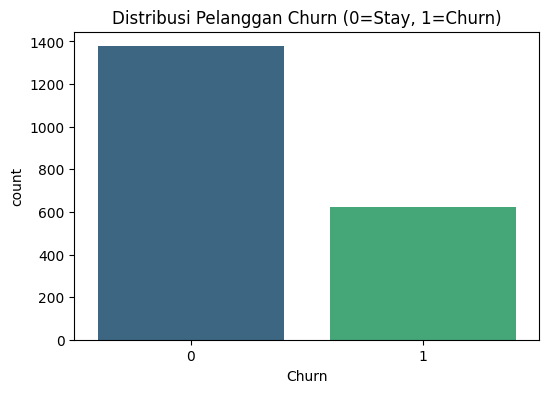

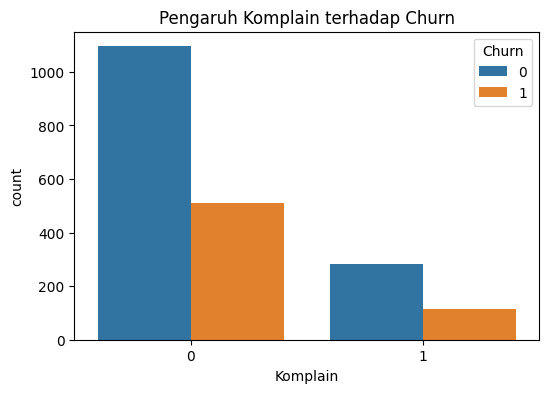

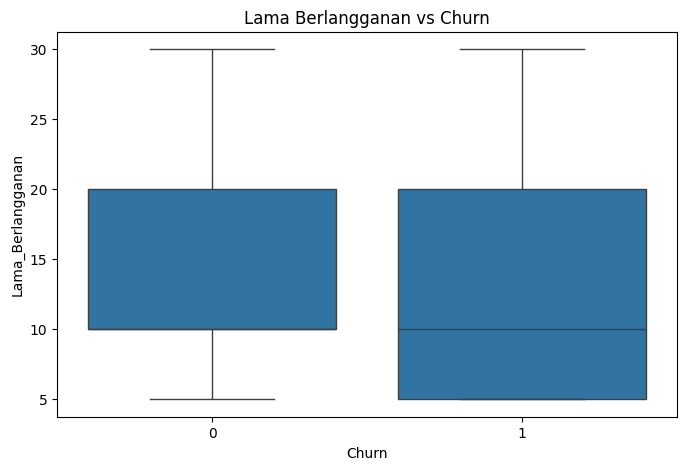

In [30]:
# Insight 1: Distribusi Target (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Pelanggan Churn (0=Stay, 1=Churn)')
plt.show()

# Insight 2: Hubungan Komplain dengan Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Komplain', hue='Churn', data=df)
plt.title('Pengaruh Komplain terhadap Churn')
plt.show()

# Insight 3: Lama Berlangganan vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Lama_Berlangganan', data=df)
plt.title('Lama Berlangganan vs Churn')
plt.show()

C:\Users\GF63\AppData\Local\Temp\ipykernel_22740\816800721.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


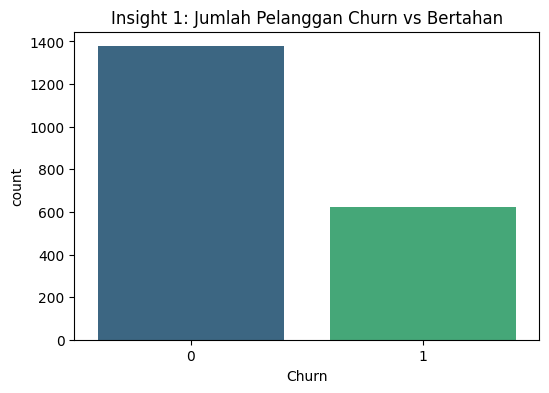

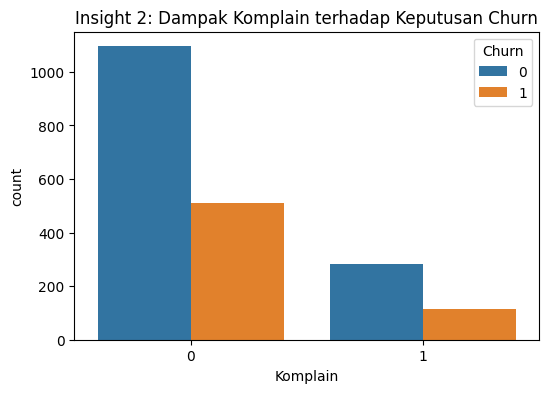

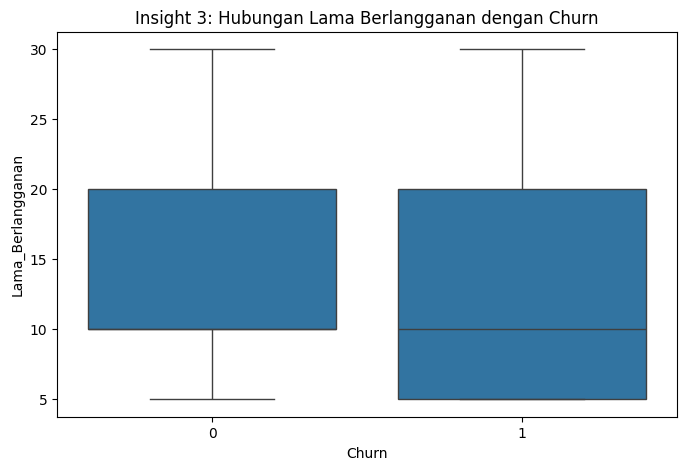

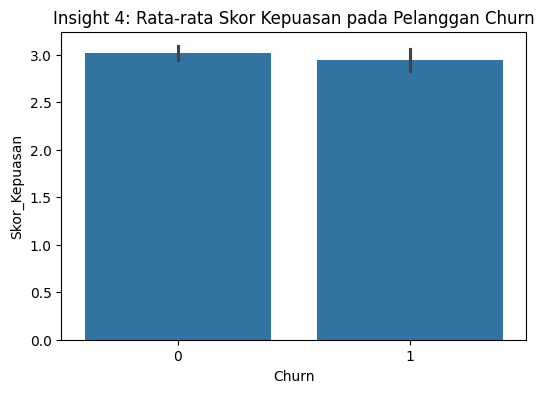

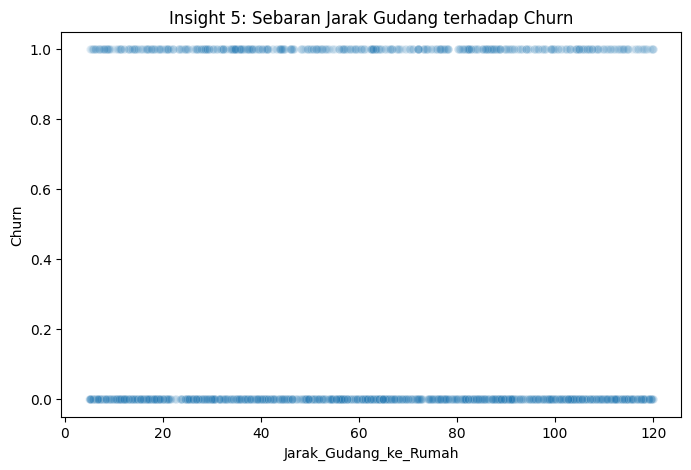

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/ecommerce_churn_dummy.csv')

# --- Visualisasi 5 Insight Kunci (Soal 2.3) ---

# 1. Distribusi Churn (Melihat keseimbangan data)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Insight 1: Jumlah Pelanggan Churn vs Bertahan')
plt.show()

# 2. Komplain vs Churn (Biasanya faktor paling berpengaruh)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Komplain', hue='Churn')
plt.title('Insight 2: Dampak Komplain terhadap Keputusan Churn')
plt.show()

# 3. Lama Berlangganan vs Churn (Melihat loyalitas)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='Lama_Berlangganan')
plt.title('Insight 3: Hubungan Lama Berlangganan dengan Churn')
plt.show()

# 4. Skor Kepuasan vs Churn
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Churn', y='Skor_Kepuasan')
plt.title('Insight 4: Rata-rata Skor Kepuasan pada Pelanggan Churn')
plt.show()

# 5. Jarak Gudang vs Churn (Melihat masalah logistik)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Jarak_Gudang_ke_Rumah', y='Churn', alpha=0.1)
plt.title('Insight 5: Sebaran Jarak Gudang terhadap Churn')
plt.show()